In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

/tmp/ipykernel_47986/3213813731.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
plt.rcParams["font.family"] = "Arial Narrow"

In [21]:
data_ori = pd.read_csv('/home/fransua/Projects/Monica_p53/data/qrtpcr/qRTPCR_results_WT_KD.txt', sep='\t')

In [4]:
data_ori = pd.read_csv('/home/fransua/Projects/Monica_p53/data/qrtpcr/qPCR_data_figureS7C.txt', sep='\t')

In [22]:
data_ori

,Cond,BR,variable,value
0,WTNut0h,BR1,TGFBR2,1.104
1,WTNut0h,BR2,TGFBR2,1.002
2,WTNut0h,BR3,TGFBR2,0.903
3,WTNut1h,BR1,TGFBR2,2.540
4,WTNut1h,BR2,TGFBR2,1.265
...,...,...,...,...
301,KDNut1h,BR2,BAX,1.674
302,KDNut1h,BR3,BAX,1.666
303,KDNut10h,BR1,BAX,9.947
304,KDNut10h,BR2,BAX,10.273


In [23]:
data = data_ori.groupby(['variable', 'Cond'], as_index=False).agg({'value': [list, 'mean', 'std']}).reset_index()
data.columns = [col[-1] or col[0] for col in data.columns]
data['list'] = data['list'].apply(lambda x: np.array(x))

In [24]:
data

,index,variable,Cond,list,mean,std
0,0,ACTR8,KDNut0h,"[0.894, 1.395, 0.802]",1.030333,0.319143
1,1,ACTR8,KDNut10h,"[1.824, 2.08, 1.419]",1.774333,0.333287
2,2,ACTR8,KDNut1h,"[0.942, 1.293, 0.817]",1.017333,0.246780
3,3,ACTR8,WTNut0h,"[1.101, 1.133, 0.802]",1.012000,0.182568
4,4,ACTR8,WTNut10h,"[1.969, 1.479, 1.077]",1.508333,0.446723
...,...,...,...,...,...,...
97,97,TP53,KDNut10h,"[1.445, 1.216, 1.473]",1.378000,0.140993
98,98,TP53,KDNut1h,"[0.694, 0.418, 0.519]",0.543667,0.139644
99,99,TP53,WTNut0h,"[1.09, 0.928, 0.989]",1.002333,0.081819
100,100,TP53,WTNut10h,"[2.025, 0.9, 1.146]",1.357000,0.591436


In [25]:
[col for col in data.columns]

['index', 'variable', 'Cond', 'list', 'mean', 'std']

In [26]:
gene_order = [
    'TGFBR2',
    'GSR',
    'LAMC1',
    'PLK2',
    'JAG2',
    'BRD7',
    'PPP1CB',
    'TENT4B',
    'TEP1',
    'CD9',
    'ACTR8',
    'CHD4',
    'PPM1D',
#     'TGFA',   # 
#     'BAX',    # 
#     'CDKN1A', #
#     'TP53',   # 
]

In [27]:
print(', '.join(sorted(gene_order)))

ACTR8, BRD7, CD9, CHD4, GSR, JAG2, LAMC1, PLK2, PPM1D, PPP1CB, TENT4B, TEP1, TGFBR2


In [28]:
names = {    
    'WTNut0h' : '0h WT',
    'KDNut0h' : '0h KD' ,
    'WTNut1h' : '1h WT' ,
    'KDNut1h' : '1h KD' ,
    'WTNut10h': '10h WT',
    'KDNut10h': '10h KD',
}

In [29]:
sample_order = [
    'WTNut0h',
    'KDNut0h',
    'WTNut1h',
    'KDNut1h',
    'WTNut10h',
    'KDNut10h',
]

In [33]:
line

,index,variable,Cond,list,mean,std
90,90,TGFBR2,KDNut0h,"[1.13160518444666, 1.0538384845463606, 0.83150...",1.008667,0.156212


In [39]:
lines = None
for g in gene_order:
    for s in sample_order:
        line = data[(data['variable'] == g) & (data['Cond'] == s)].copy()
        if list(line['Cond'].str.contains('WT'))[0]:
            line['list'] = line['list'] / line['mean']
        else:
            line['list'] = line['list'] / list(prev_line['mean'])[0]
        if lines is None:
            lines = line
        else:
            # lines = lines.append(line)
        prev_line = line.copy()

IndentationError: expected an indented block after 'else' statement on line 11 (1211834752.py, line 13)

In [40]:
lines

,index,variable,Cond,list,mean,std
0,93,TGFBR2,WTNut0h,"[1.1006979062811566, 0.9990029910269191, 0.900...",1.003000,0.100504
1,90,TGFBR2,KDNut0h,"[1.13160518444666, 1.0538384845463606, 0.83150...",1.008667,0.156212
2,95,TGFBR2,WTNut1h,"[1.4897360703812317, 0.7419354838709676, 0.768...",1.705000,0.723481
3,92,TGFBR2,KDNut1h,"[0.7759530791788856, 1.118475073313783, 0.6011...",1.418333,0.448662
4,94,TGFBR2,WTNut10h,"[0.9063814866760167, 1.08765778401122, 1.00596...",2.852000,0.258919
...,...,...,...,...,...,...
73,60,PPM1D,KDNut0h,"[1.1296538210320053, 1.0473546701502285, 0.794...",1.011000,0.178225
74,65,PPM1D,WTNut1h,"[1.1245128966413063, 1.0170718129523102, 0.858...",1.796333,0.240471
75,62,PPM1D,KDNut1h,"[0.5121543885693078, 0.580627203562813, 0.4169...",0.904000,0.147652
76,64,PPM1D,WTNut10h,"[1.2884371029224904, 0.6908415599648128, 1.020...",3.410333,1.020836


In [41]:
from scipy.stats import wilcoxon

In [42]:
sample_order

['WTNut0h', 'KDNut0h', 'WTNut1h', 'KDNut1h', 'WTNut10h', 'KDNut10h']

369.0 0.9826446560128709
55.0 2.0684092305600643e-07
88.0 5.757588951382786e-06


/home/fransua/.miniconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


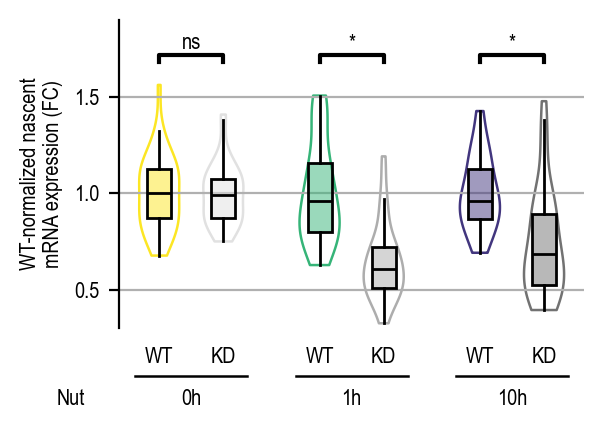

In [44]:
plt.figure(figsize=(3, 2), dpi=200)
ax = plt.subplot()
vals = [
    [v for g in gene_order 
     for v in list(lines[(lines['variable']==g) & (lines['Cond']==s)]['list'])[0]] 
    for s in sample_order
]
stats = []
y0 = 1.68
y1 = 1.72
yt = 1.75
positions = [1.1, 1.9, 3.1, 3.9, 5.1, 5.9]
for n, v1 in enumerate(vals[::2]):
    v2 = vals[1 + n * 2]
    r, pv = wilcoxon(v1, v2)
    print (r, pv)
#     plt.plot([x0, x1, x1, x0], [n * 2 + 1, n * 2 + 1, n * 2 + 2, n * 2 + 2], color='k')
    plt.plot([positions[n * 2], positions[n * 2], positions[n * 2 + 1],
              positions[n * 2 + 1]], [y0, y1, y1, y0], color='k')
    plt.text(n * 2 + 1.5, yt, '*' if pv < 0.05 else 'ns', ha='center', size=8)
plt.ylim(0.3, 1.9)

colors = [
    (253 / 256, 231 / 256,  36 / 256, 0.5), #  0h WT
    (226 / 256, 226 / 256, 226 / 256, 0.5), #  0h KD
    ( 54 / 256, 181 / 256, 120 / 256, 0.5), #  1h WT
    (174 / 256, 174 / 256, 174 / 256, 0.5), #  1h KD
    ( 66 / 256,  54 / 256, 126 / 256, 0.5), # 10h WT
    (114 / 256, 114 / 256, 114 / 256, 0.5), # 10h KD
]

bps = plt.boxplot(vals, vert=True, positions=positions, showcaps=False, showfliers=False, patch_artist=True,
                  boxprops=dict(facecolor='none', color='k'), medianprops=dict(color='k'), widths=0.3)
for n, b in enumerate(bps['boxes']):
    b.set_facecolor(colors[n])
                  
vls = plt.violinplot(vals, vert=True, positions=positions, showextrema=False)
for n, v in enumerate(vls['bodies']):
    v.set_facecolor("None")
    v.set_edgecolor(list(colors[n][:-1]) + [20])
    v.set_linewidth(0.9)
    v.set_alpha(1)

plt.grid(axis='y')

plt.xticks(positions, [names[s].split()[1] for s in sample_order], size=8)
for n, s in enumerate(sample_order[::2]):
    plt.text(positions[n * 2] + 0.4, -0.1, names[s].split()[0], size=8, ha='center')
    plt.plot([n * 2 + 0.8, n * 2 + 2.2], [0.05, 0.05], 'k', lw=0.9, clip_on=False)
plt.text(0, -0.1, 'Nut', size=8, ha='center')
plt.yticks(size=8)
ax.spines[['right', 'top', 'bottom']].set_visible(False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) 

plt.ylabel('WT-normalized nascent\nmRNA expression (FC)', size=8);
plt.savefig("/home/fransua/Projects/Monica_p53/results/degron/Suppl_norm_expr_FC.pdf", dpi=300)

In [45]:
sample_order[:2]

['WTNut0h', 'KDNut0h']

88.0 5.757588951382786e-06
55.0 2.0684092305600643e-07
369.0 0.9826446560128709


/home/fransua/.miniconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


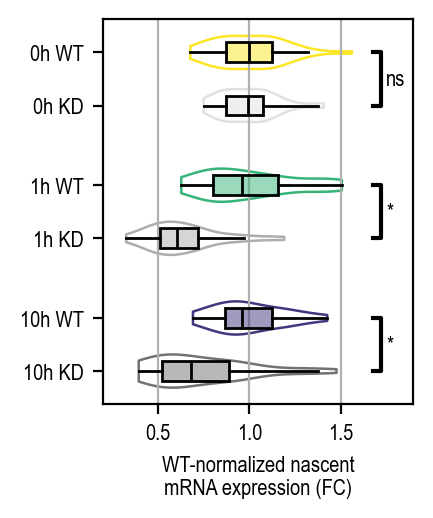

In [46]:
plt.figure(figsize=(2, 2.5), dpi=200)
vals = [
    [v for g in gene_order 
     for v in list(lines[(lines['variable']==g) & (lines['Cond']==s)]['list'])[0]] 
    for s in sample_order[::-1]
]
stats = []
x0 = 1.68
x1 = 1.72
xt = 1.75
positions = [1.1, 1.9, 3.1, 3.9, 5.1, 5.9]
for n, v1 in enumerate(vals[::2]):
    v2 = vals[1 + n * 2]
    r, pv = wilcoxon(v1, v2)
    print (r, pv)
#     plt.plot([x0, x1, x1, x0], [n * 2 + 1, n * 2 + 1, n * 2 + 2, n * 2 + 2], color='k')
    plt.plot([x0, x1, x1, x0], [positions[n * 2], positions[n * 2], positions[n * 2 + 1],
                                positions[n * 2 + 1]], color='k')
    plt.text(xt, n * 2 + 1.5, '*' if pv < 0.05 else 'ns', va='center', size=8)
plt.xlim(0.2, 1.9)

colors = [
    (253 / 256, 231 / 256,  36 / 256, 0.5), #  0h WT
    (226 / 256, 226 / 256, 226 / 256, 0.5), #  0h KD
    ( 54 / 256, 181 / 256, 120 / 256, 0.5), #  1h WT
    (174 / 256, 174 / 256, 174 / 256, 0.5), #  1h KD
    ( 66 / 256,  54 / 256, 126 / 256, 0.5), # 10h WT
    (114 / 256, 114 / 256, 114 / 256, 0.5), # 10h KD
][::-1]

bps = plt.boxplot(vals, vert=False, positions=positions, showcaps=False, showfliers=False, patch_artist=True,
                  boxprops=dict(facecolor='none', color='k'), medianprops=dict(color='k'), widths=0.3)
for n, b in enumerate(bps['boxes']):
    b.set_facecolor(colors[n])
                  
vls = plt.violinplot(vals, vert=False, positions=positions, showextrema=False)
for n, v in enumerate(vls['bodies']):
    v.set_facecolor("None")
    v.set_edgecolor(list(colors[n][:-1]) + [20])
    v.set_linewidth(0.9)
    v.set_alpha(1)

plt.grid(axis='x')

plt.yticks(positions, [names[s] for s in sample_order][::-1], size=8)
plt.xticks(size=8)
plt.xlabel('WT-normalized nascent\nmRNA expression (FC)', size=8);
plt.savefig("/home/fransua/Projects/Monica_p53/results/degron/Suppl_norm_expr_FC.pdf", dpi=300)

In [22]:
colors = [
    "#fde72580",
    "#E2E2E2",
    "#37b57880",
    "#AEAEAE",
    "#43377f80",
    "#727272"]

In [23]:
len(data) / 6

17.0

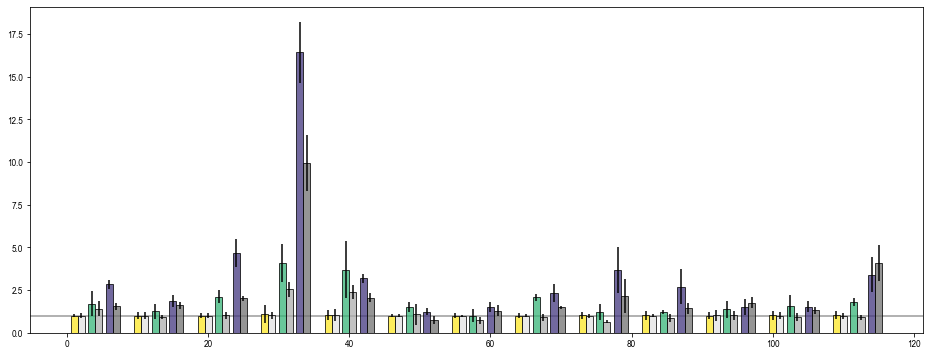

In [24]:
plt.figure(figsize=(16, 6))
slines = lines
plt.bar([v for l in [np.array([1, 2, 3.5, 4.5, 6, 7]) + i * 9 for i in range(len(slines) // 6)] for v in l], 
        slines['mean'], yerr=slines['std'], width=1, ec='k', color=colors * (len(slines) // 6), alpha=0.75)
plt.axhline(1, alpha=0.8, color='grey', zorder=-10)

In [25]:
from scipy.stats import ttest_rel

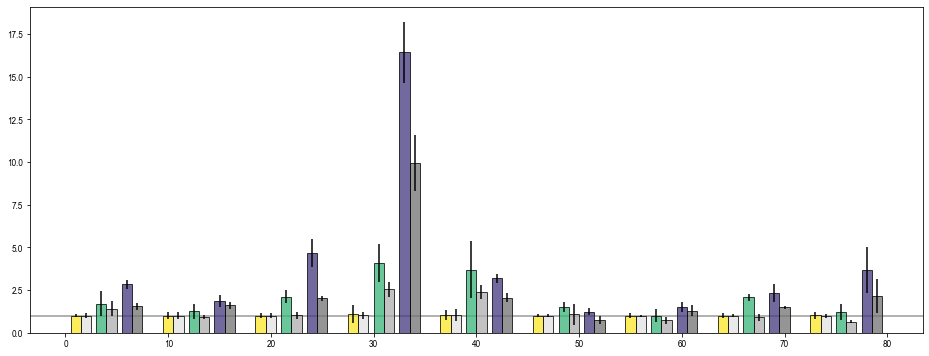

In [27]:
plt.figure(figsize=(16, 6))
slines = lines[:9 * 6]
plt.bar([v for l in [np.array([1, 2, 3.5, 4.5, 6, 7]) + i * 9 for i in range(len(slines) // 6)] for v in l], 
        slines['mean'], yerr=slines['std'], width=1, ec='k', color=colors * (len(slines) // 6), alpha=0.75)
plt.axhline(1, alpha=0.8, color='grey', zorder=-10)

In [28]:
data

,index,variable,Cond,list,mean,std
0,0,ACTR8,KDNut0h,"[0.894, 1.395, 0.802]",1.030333,0.319143
1,1,ACTR8,KDNut10h,"[1.824, 2.08, 1.419]",1.774333,0.333287
2,2,ACTR8,KDNut1h,"[0.942, 1.293, 0.817]",1.017333,0.246780
3,3,ACTR8,WTNut0h,"[1.101, 1.133, 0.802]",1.012000,0.182568
4,4,ACTR8,WTNut10h,"[1.969, 1.479, 1.077]",1.508333,0.446723
...,...,...,...,...,...,...
97,97,TP53,KDNut10h,"[1.445, 1.216, 1.473]",1.378000,0.140993
98,98,TP53,KDNut1h,"[0.694, 0.418, 0.519]",0.543667,0.139644
99,99,TP53,WTNut0h,"[1.09, 0.928, 0.989]",1.002333,0.081819
100,100,TP53,WTNut10h,"[2.025, 0.9, 1.146]",1.357000,0.591436


In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [74]:
for t in ['0h', '1h', '10h']:
    tmp = data_ori[data_ori['Cond'].str.contains(f'KDNut{t}') | data_ori['Cond'].str.contains(f'WTNut{t}')]
    tmp = tmp[tmp['variable'].isin(gene_order)]
    md = smf.mixedlm("value ~ Cond", tmp, groups=tmp["variable"])
    mdf = md.fit()
    print(f'Test WT-{t} vs KD-{t}:\t', mdf.pvalues[f'Cond[T.WTNut{t}]'])

Test WT-0h vs KD-0h:	 0.8716809534398896
Test WT-1h vs KD-1h:	 4.948091946377563e-09
Test WT-10h vs KD-10h:	 7.286758060823123e-06


/home/fransua/.miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/fransua/.miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/home/fransua/.miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/fransua/.miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [73]:
for t in ['1h', '10h']:
    tmp = data_ori[data_ori['Cond'].str.contains(f'WTNut0h') | data_ori['Cond'].str.contains(f'WTNut{t}')]
    tmp = tmp[tmp['variable'].isin(gene_order)]gam lambda
    
    md = smf.mixedlm("value ~ Cond", tmp, groups=tmp["variable"])
    mdf = md.fit()
    print(f'Test WT-0h vs WT-{t}:\t', mdf.pvalues[f'Cond[T.WTNut{t}]'])

Test WT-0h vs WT-1h:	 1.1949277462661382e-08
Test WT-0h vs WT-10h:	 1.387872740355734e-07
